In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
# 붗꽃 데이터 세트 로딩
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df_summary = iris_df.describe()  # Replace df with your DataFrame
print(tabulate(df_summary, headers="keys", tablefmt="github"))

|       |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |      label |
|-------|---------------------|--------------------|---------------------|--------------------|------------|
| count |          150        |         150        |            150      |         150        | 150        |
| mean  |            5.84333  |           3.05733  |              3.758  |           1.19933  |   1        |
| std   |            0.828066 |           0.435866 |              1.7653 |           0.762238 |   0.819232 |
| min   |            4.3      |           2        |              1      |           0.1      |   0        |
| 25%   |            5.1      |           2.8      |              1.6    |           0.3      |   0        |
| 50%   |            5.8      |           3        |              4.35   |           1.3      |   1        |
| 75%   |            6.4      |           3.3      |              5.1    |           1.8      |   2        |
| max   |          

<Axes: >

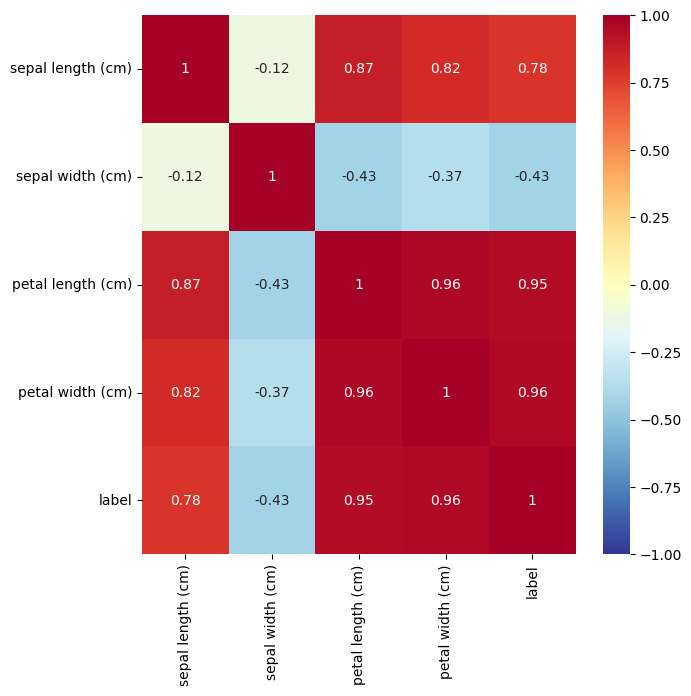

In [8]:
#변수간 상관관계:
corr_matrix = iris_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(corr_matrix, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )

Petal length, petal width 와 label 그룹중에 매우 강한 상관성이 있다.

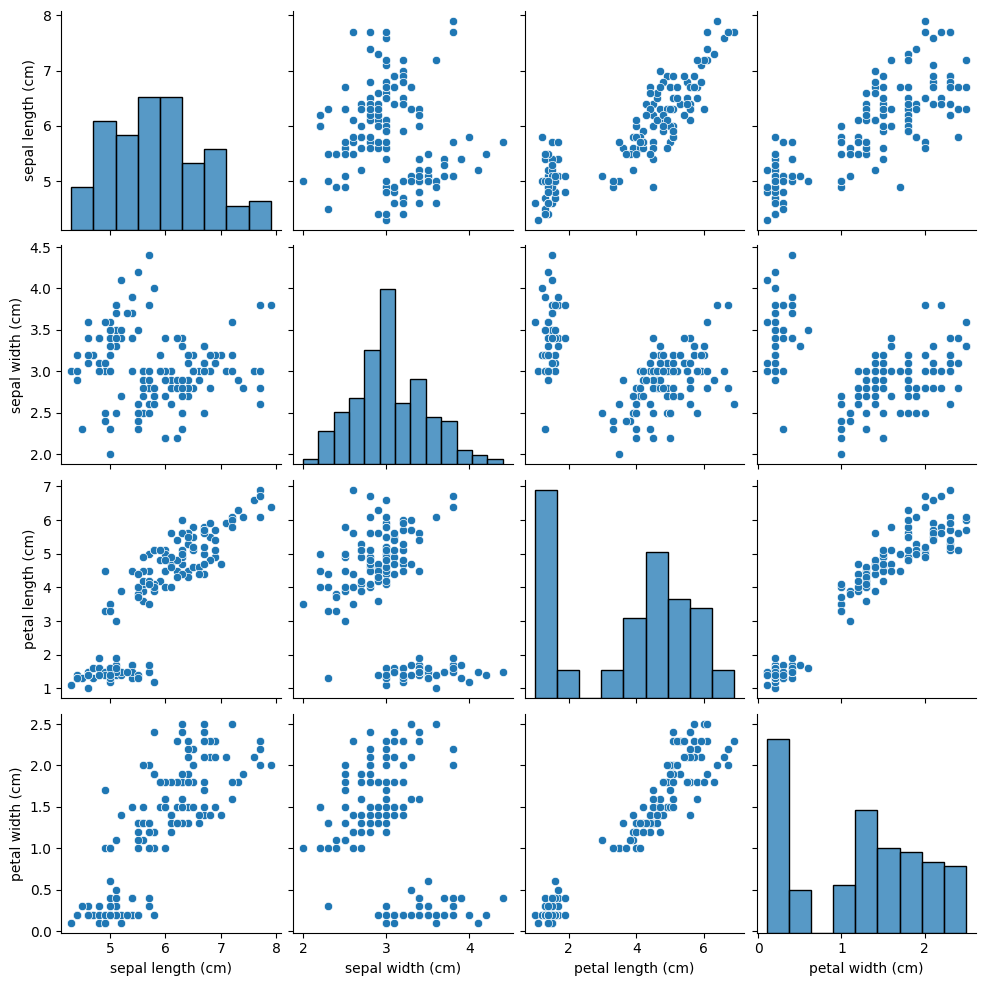

In [9]:
sns.pairplot(iris_df.drop(['label'],axis=1))

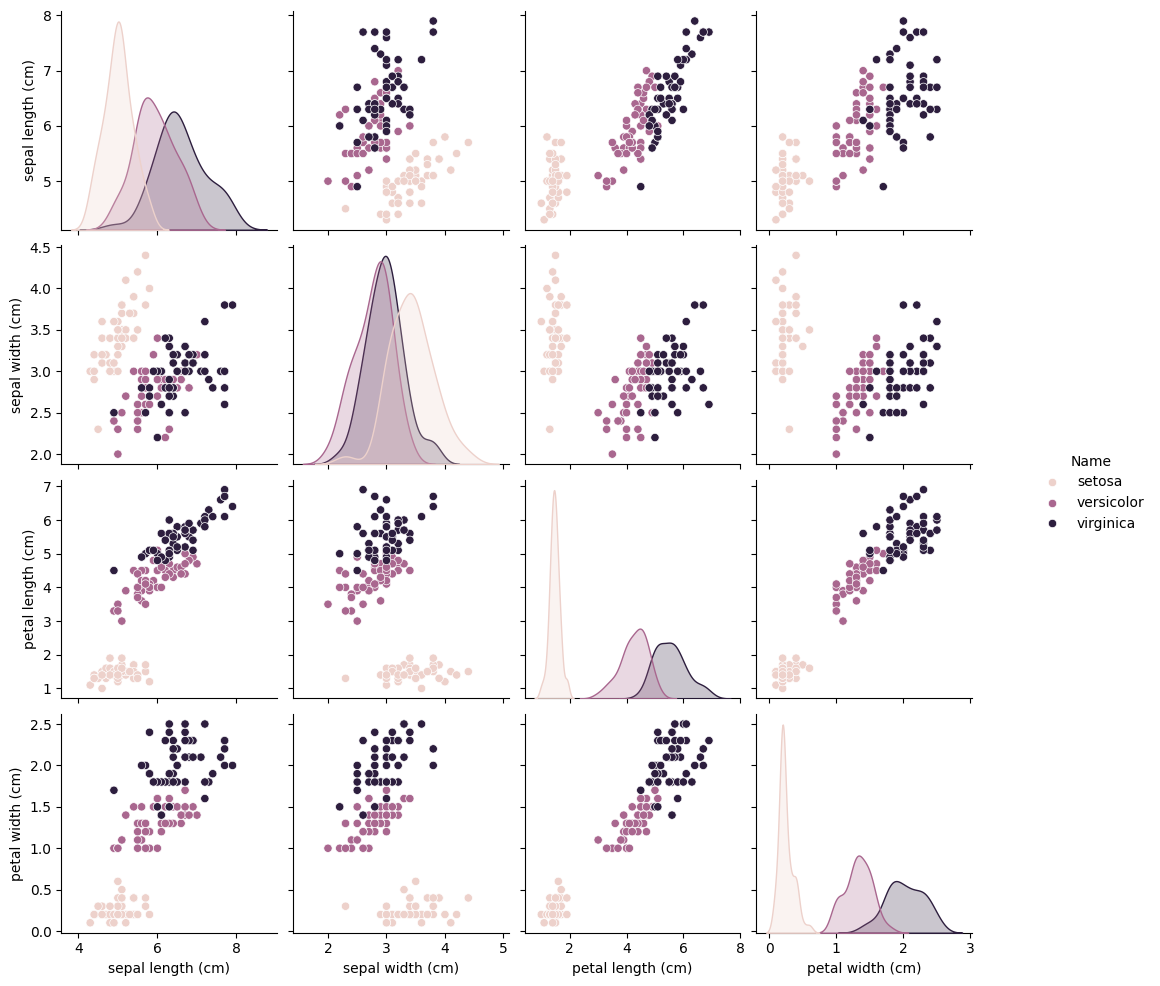

In [10]:
fig2=sns.pairplot(iris_df,hue='label')
#g._legend.set_title("Name")
#[g._legend.texts[i].set_text(name) for i,name in enumerate(iris.target_names)]
sns.move_legend(fig2, "center right", bbox_to_anchor=(1.1, 0.5),labels=iris.target_names,title="Name")

[None, None, None]

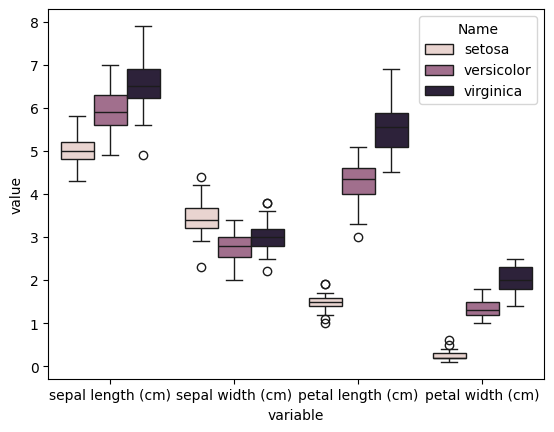

In [11]:
iris_long = iris_df.melt(id_vars=['label'])
g = sns.boxplot(data=iris_long, y="value", x="variable",orient="v", hue="label") # palette="Set2", hue="label")
g.legend_.set_title("Name")
[g.legend_.texts[i].set_text(name) for i,name in enumerate(iris.target_names)]

In [23]:
#statistical test
#loop over variables
from scipy import stats

grouped = iris_df.groupby('label')
for var in iris_df.columns.drop('label'):
    f_statistic, p_value = stats.f_oneway(*[group_df[[var]] for _,group_df in grouped])
    print (f'{var:20s}, p-value : {p_value}; ' + "different" if p_value<0.05 else "same" )
 

sepal length (cm)   , p-value : [1.66966919e-31]; different
sepal width (cm)    , p-value : [4.49201713e-17]; different
petal length (cm)   , p-value : [2.85677661e-91]; different
petal width (cm)    , p-value : [4.16944584e-85]; different


In [13]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [14]:
X = iris_df.drop('label',axis=1).values
y = iris_df["label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=303)

In [15]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=303)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
print(' DecisionTree 정확도: {0:.4f}'.format(accuracy_score(y_test, tree_pred)))
print(' DecisionTree F1 score: {0:.4f}'.format(f1_score(y_test, tree_pred,average='micro')))

 DecisionTree 정확도: 1.0000
 DecisionTree F1 score: 1.0000


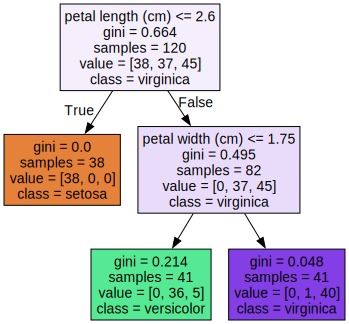

In [16]:
#결정트리의 구조 출력
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
# print(os.environ['PATH'])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
softmax_reg = LogisticRegression(C=30, random_state=303)
softmax_reg.fit(X_train, y_train)
lr_pred = softmax_reg.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression F1 score: {0:.4f}'.format(f1_score(y_test, lr_pred,average='micro')))

LogisticRegression 정확도: 1.0000
LogisticRegression F1 score: 1.0000


d:\project\0206_wine_analysis_project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(softmax_reg,X_test,y_test)

print("Feature importance:")
for score_tree, score_reg, name in zip(tree_clf.feature_importances_, 
                        perm_importance.importances_mean,
                        iris_df.columns.drop('label')):
    print(f"Name {name:20s}: DecisionTree {score_tree:.4f}; LogisticRegression {score_reg:.4f}")

Feature importance:
Name sepal length (cm)   : DecisionTree 0.0000; LogisticRegression 0.0267
Name sepal width (cm)    : DecisionTree 0.0000; LogisticRegression 0.0333
Name petal length (cm)   : DecisionTree 0.5667; LogisticRegression 0.6533
Name petal width (cm)    : DecisionTree 0.4333; LogisticRegression 0.1333


In [21]:
df1 = pd.DataFrame(zip(iris_df.columns.drop('label'),
                       tree_clf.feature_importances_, 
                        perm_importance.importances_mean
                        ),
                        columns=["name","Decision Tree", "Logistic Regression"])

([0, 1, 2, 3],
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

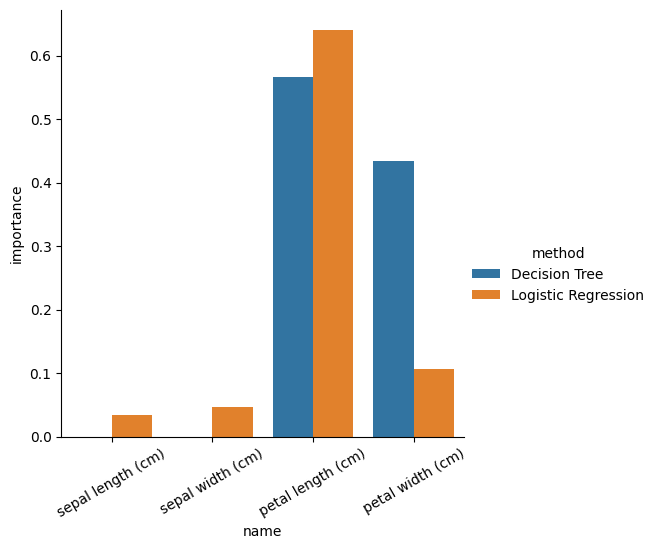

In [22]:
sns.catplot(df1.melt(id_vars="name",var_name="method",value_name="importance"), 
            x="name",y="importance",
            kind="bar", hue="method",errorbar=None)
plt.xticks(rotation=30)

Tuning of parameters C LogisticRegression and max_depth in DecisionTreeClassifier models can be performed.